<a href="https://colab.research.google.com/github/Akramkhan01/Face-Emotion-Recognition-Deep-Learning-Project/blob/main/Face_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name**

**Live Class Monitoring System(Face Emotion Recognition)**


# **Project Introduction**

The Indian education landscape has been undergoing rapid changes for the past 10 years owing to the advancement of web-based learning services, specifically, eLearning platforms.

Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market is growing on a rapid scale, there are major challenges associated with digital learning when compared with brick and mortar classrooms. One of many challenges is how to ensure quality learning for students. Digital platforms might overpower physical classrooms in terms of content quality but when it comes to understanding whether students are able to grasp the content in a live class scenario is yet an open-end challenge.

In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who need special attention. Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the mood. Because of this drawback, students are not focusing on content due to lack of surveillance. While digital platforms have limitations in terms of physical surveillance but it comes with the power of data and machines which can work for you. It provides data in the form of video, audio, and texts which can be analysed using deep learning algorithms. Deep learning backed system not only solves the surveillance issue, but it also removes the human bias from the system, and all information is no longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.

# **Problem Statements**

We will solve the above-mentioned challenge by applying deep learning algorithms to live video data.

The solution to this problem is by recognizing facial emotions.

# **What is Face Emotion Recognition**

Facial emotion recognition is the process of detecting human emotions from facial expressions. The human brain recognizes emotions automatically, and software has now been developed that can recognize emotions as well.

# **Dataset Information:**
I have built a deep learning model which detects the real time emotions of students through a webcam so that teachers can understand if students are able to grasp the topic according to students' expressions or emotions and then deploy the model. The model is trained on the FER-2013 dataset .This dataset consists of 35887 grayscale, 48x48 sized face images with seven emotions - angry, disgusted, fearful, happy, neutral, sad and surprised.




In [1]:
import os
import cv2
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## CNN Models ##
import keras
import tensorflow as tf
from tensorflow.keras import optimizers
from keras.utils import np_utils
from keras.regularizers import l2
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D, SeparableConv2D
from tensorflow.keras.layers import Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras.utils.vis_utils import plot_model
from keras.layers import Input, GlobalAveragePooling2D,concatenate
from keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import load_model

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [2]:
batch_size = 32
num_epochs = 50
input_shape = (48, 48, 1)
validation_split = .2
verbose = 1
num_classes = 7
base_path = 'models/'
shape_x = 48
shape_y = 48
image_size=(48,48)

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
%cd /content/gdrive/MyDrive/Face Emotion Recognition - Akram Khan

/content/gdrive/MyDrive/Face Emotion Recognition - Akram Khan


In [5]:
# Converting our data from tar file to csv file
import tarfile

fname = 'fer2013.tar.gz'
if fname.endswith("tar.gz"):
    tar = tarfile.open(fname, "r:gz")
    tar.extractall()
    tar.close()
elif fname.endswith("tar"):
    tar = tarfile.open(fname, "r:")
    tar.extractall()
    tar.close()

In [6]:
# Reading CSV file
df = pd.read_csv('/content/gdrive/MyDrive/Face Emotion Recognition - Akram Khan/fer2013/fer2013.csv')

In [7]:
# Printing shape of the data
print(df.shape)

(35887, 3)


In [8]:
# Return the first 5 rows.
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [9]:
# Return unique values emotion
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [10]:
# Dictionary mapping for individual emotions
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


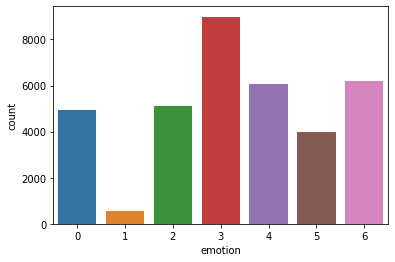

In [11]:
# Plotting distribution of emotions
sns.countplot(df.emotion)
plt.show()

From above plot we can observe that majority of the classes belongs to **3:Happy, 4:Sad** and **6:Neutral** on the otherside **1:disgust** and **5:surprise** are less in classes.

In [12]:
# Value counts on each set
df["Usage"].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


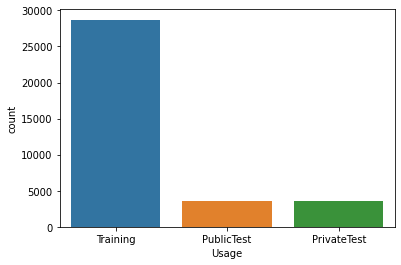

In [13]:
# Let's plot the count of each set
sns.countplot(df.Usage)
plt.show()

#**Displaying Images**

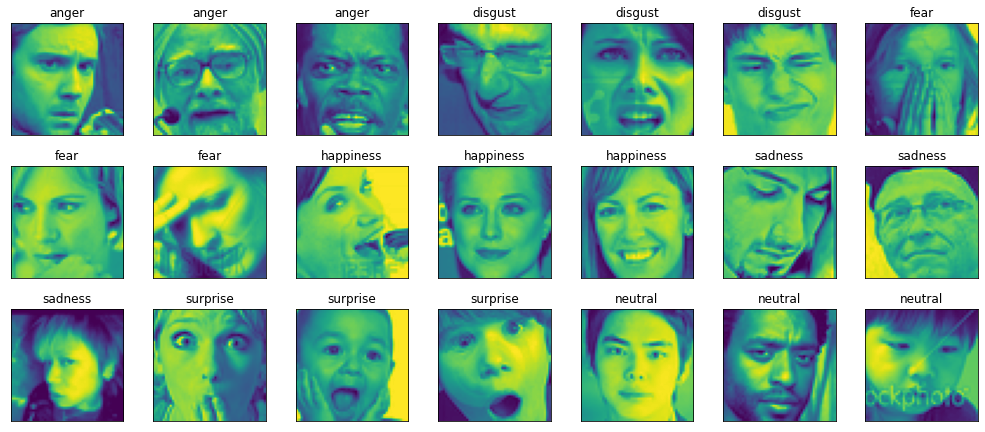

In [17]:
# Visulize sample dataset
fig = plt.figure(1, (14, 14))
k = 0
for label in sorted(df.emotion.unique()):
    for j in range(3):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])
        plt.tight_layout()

#**Preprocessing**

In [18]:
df['pixels']=df['pixels'].astype("string") #converting dtype of pixels to string
pixels = df['pixels'].tolist() #Making list of pixels
width, height = 48, 48 # initializing image shape
faces = [] #Empty list
# Making images as required for our models  
for pixel_sequence in pixels:
    face = [int(pixel) for pixel in pixel_sequence.strip().split(' ',48*48)]
    face = np.asarray(face).reshape(width, height)
    face = cv2.resize(face.astype('uint8'),image_size)
    faces.append(face.astype('float32'))
# Converting to array and dimension for transfer Learning
faces = np.asarray(faces)
faces = np.expand_dims(faces, -1)
faces /= 127.5 # normalizing the data
faces -= 1.
# Converting Emotions to numpy array
emotions = pd.get_dummies(df['emotion']).to_numpy()

#**Data Augmentation**
**Data Augmentation**:- taking the batch and apply some series of random transformations (random rotation, resizing, shearing) to increase generalizability of model.

In [19]:
# data generator Generate batches of tensor image data with real-time data augmentation
data_generator = ImageDataGenerator(
                        featurewise_center=False,#Set input mean to 0 over the dataset, feature-wise.
                        featurewise_std_normalization=False,# Divide inputs by std of the dataset, feature-wise.
                        rotation_range=10,      # randomly rotate images in the range (degrees, 0 to 180)
                        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                        height_shift_range=0.1, # randomly shift images vertically (fraction of total height)
                        zoom_range=.1,          # randomly zoom into images
                        horizontal_flip=True)   # randomly flip images

ImageDataGenerator

horizontal and vertical shift => moving all pixels of image in one direction

1. width_shift_range ( horizonatal shift)

2. height_shift_range (vertical shift)

3. floating num [0- 1] --> % of shift

* horizontal n vertical flips augmentation ==>reversing rows or cols of pixels --> True or False

* Random rotation --> 0 - 360 degrees --> rotation_range = 90 ==> means random rotation to image blw 0 and 90 degrees

* random brightness --> randomly darkens or brightens images ==> brightness_range =[0.2,1.0] --> means darkens or brightens if pixel is blw 0.2 and 1

* random zoom

1. either adds pixel or subtract pixels in image . [1-value, 1+value]

2. for example , zoom_range = .3 --> range [0.7, 1.3] or blw 70%(zoom in) and 130% (zoomout)

#**Splitting data into train and test datset**

In [20]:
#train test split
xtrain, xtest,ytrain,ytest = train_test_split(faces, emotions,test_size=0.3,shuffle=True)
xval,xtest,yval,ytest=train_test_split(xtest,ytest,test_size=0.3,shuffle=True)

In [21]:
# Checking shapes
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape, xval.shape, xtest.shape, yval.shape, ytest.shape

((25120, 48, 48, 1),
 (3231, 48, 48, 1),
 (25120, 7),
 (3231, 7),
 (7536, 48, 48, 1),
 (3231, 48, 48, 1),
 (7536, 7),
 (3231, 7))

#**Method 1: Directly Using DeepFace :**

Deepface is a lightweight face recognition and facial attribute analysis (age, gender, emotion and race) framework for python.

[Paper](https://en.wikipedia.org/wiki/DeepFace)


In [22]:
# Installing DeepFace
!pip install deepface

     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 2.3 MB 48.0 MB/s 
     |████████████████████████████████| 462 kB 56.0 MB/s 


In [29]:
# Upload A file from local Drive
from google.colab import files
uploaded = files.upload()

Saving images (1).jpg to images (1).jpg


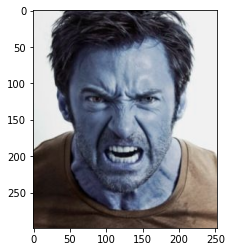

In [30]:
# Image Show
import cv2
import matplotlib.pyplot as plt
img_array=cv2.imread("images (1).jpg")
plt.imshow(img_array)

In [32]:
# Analyze Image using DeepFace
from deepface import DeepFace
obj = DeepFace.analyze(img_path = "images (1).jpg", actions = ['age', 'gender', 'race', 'emotion'])
print(obj["age"]," years old ",obj["dominant_race"]," ",obj["dominant_emotion"]," ", obj["gender"])

Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]

35  years old  white   fear   Man


The actual emotion in the Picture above is Angry Face but using DeepFace I found the prediction is fear.

It's Better to train our own model.

#**Method 2: ResNet**

[Paper](https://d2l.ai/chapter_convolutional-modern/resnet.html)

## 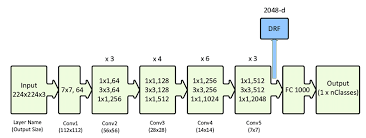

**ResNet-50** architecture shown with the residual units, the size of the filters and the outputs of each convolutional layer. DRF extracted from the last convolutional layer of this network is also shown. Key: The notation k × k, n in the convolutional layer block denotes a filter of size k and n channels. FC 1000 denotes the fully connected layer with 1000 neurons. The number on the top of the convolutional layer block represents the repetition of each unit. nClasses represents the number of output classes.

In [39]:
# Giving address of resnet50 weights
WEIGHTS_PATH = ('https://github.com/fchollet/deep-learning-models/'
                'releases/download/v0.2/'
                'resnet50_weights_tf_dim_ordering_tf_kernels.h5')
WEIGHTS_PATH_NO_TOP = ('https://github.com/fchollet/deep-learning-models/'
                       'releases/download/v0.2/'
                       'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5')

backend = None
layers = None
models = None
keras_utils = None

# Building up model architecture

# Defining the identity block
def identity_block(input_tensor, kernel_size, filters, stage, block):
    filters1, filters2, filters3 = filters
    bn_axis = 3
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = keras.layers.Conv2D(filters1, (1, 1),
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2a')(input_tensor)
    x = keras.layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(filters2, kernel_size,
                      padding='same',
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2b')(x)
    x = keras.layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(filters3, (1, 1),
                      kernel_initializer='he_normal',
                   name=conv_name_base + '2c')(x)
    x = keras.layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    x = keras.layers.add([x, input_tensor])
    x = keras.layers.Activation('relu')(x)
    return x

# Defining convolutional block
def conv_block(input_tensor, kernel_size, filters, stage, block, strides=(2, 2)):

    filters1, filters2, filters3 = filters
    bn_axis = 3
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = keras.layers.Conv2D(filters1, (1, 1), strides=strides,
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2a')(input_tensor)
    x = keras.layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(filters2, kernel_size, padding='same',
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2b')(x)
    x = keras.layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(filters3, (1, 1),
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2c')(x)
    x = keras.layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    shortcut = keras.layers.Conv2D(filters3, (1, 1), strides=strides,
                             kernel_initializer='he_normal',
                             name=conv_name_base + '1')(input_tensor)
    shortcut = keras.layers.BatchNormalization(
        axis=bn_axis, name=bn_name_base + '1')(shortcut)

    x = keras.layers.add([x, shortcut])
    x = keras.layers.Activation('relu')(x)
    return x

# Defining resnet50 
def ResNet50(include_top=True, weights='imagenet', input_tensor=None, input_shape=input_shape, pooling=None, classes=7):

    if not (weights in {'imagenet', None} or os.path.exists(weights)):
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization), `imagenet` '
                         '(pre-training on ImageNet), '
                         'or the path to the weights file to be loaded.')

    if weights == 'imagenet' and include_top and classes != 7:
        raise ValueError('If using `weights` as `"imagenet"` with `include_top`'
                         ' as true, `classes` should be 1000')

    if input_tensor is None:
        img_input = keras.layers.Input(shape=input_shape)
    else:
        if not backend.is_keras_tensor(input_tensor):
            img_input = keras.layers.Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor
    bn_axis = 3


    x = keras.layers.ZeroPadding2D(padding=(3, 3), name='conv1_pad')(img_input)
    x = keras.layers.Conv2D(64, (7, 7),
                      strides=(2, 2),
                      padding='valid',
                      kernel_initializer='he_normal',
                      name='conv1')(x)
    x = keras.layers.BatchNormalization(axis=bn_axis, name='bn_conv1')(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.ZeroPadding2D(padding=(1, 1), name='pool1_pad')(x)
    x = keras.layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = conv_block(x, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1))
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='b')
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='c')

    x = conv_block(x, 3, [128, 128, 512], stage=3, block='a')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='b')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='c')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='d')

    x = conv_block(x, 3, [256, 256, 1024], stage=4, block='a')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='b')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='c')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='d')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='e')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='f')

    x = conv_block(x, 3, [512, 512, 2048], stage=5, block='a')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='b')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='c')

    if include_top:
        x = keras.layers.GlobalAveragePooling2D(name='avg_pool')(x)
        x = keras.layers.Dense(classes, activation='softmax', name='fc1000')(x)
    else:
        if pooling == 'avg':
            x = keras.layers.GlobalAveragePooling2D()(x)
        elif pooling == 'max':
            x = keras.layers.GlobalMaxPooling2D()(x)
        else:
            warnings.warn('The output shape of `ResNet50(include_top=False)` '
                          'has been changed since Keras 2.2.0.')

    inputs = img_input
    # Create model.
    model = keras.models.Model(inputs, x, name='resnet50')

    return model

In [40]:
resnet50= ResNet50()

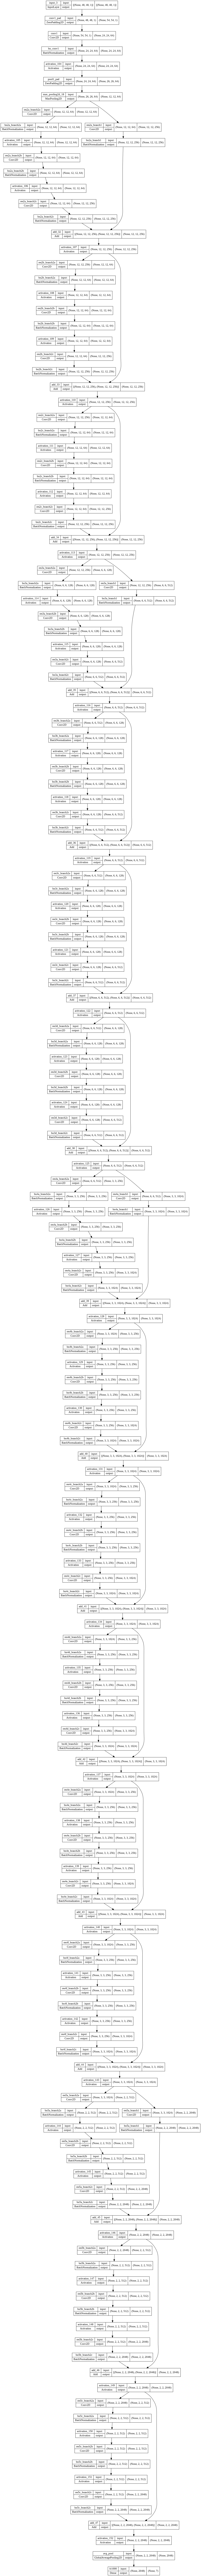

In [41]:
# Plotting the architecture of defined model
plot_model(resnet50, to_file='resnet50.png', show_shapes=True, show_layer_names=True)

In [42]:
# Compile the model
resnet50.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
resnet50.summary() #gives the information about the architecture and configuration of the neural network.

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 48, 48, 1)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 1)    0           ['input_3[0][0]']                
                                                                                                  
 conv1 (Conv2D)                 (None, 24, 24, 64)   3200        ['conv1_pad[0][0]']              
                                                                                                  
 bn_conv1 (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1[0][0]']                  
                                                                                           